In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load the data

In [3]:
# Load the data
url = 'https://drive.google.com/uc?export=download&id=1TLTuZ-Zc0Mcl16aYLdHqVKHneXmCdR5t'
data = pd.read_csv(url)

## Data preview and validation

In [4]:
# Data preview
print(data.head())

    C1  N1   C2   C3    N2   C4   C5  N3 C5.1    C6  ...    C7  N5    C8  \
0  Z11   6  Z34  Z43  1169  Z65  Z75   4  Z93  Z101  ...  Z121  67  Z143   
1  Z12  48  Z32  Z43  5951  Z61  Z73   2  Z92  Z101  ...  Z121  22  Z143   
2  Z14  12  Z34  Z46  2096  Z61  Z74   2  Z93  Z101  ...  Z121  49  Z143   
3  Z11  42  Z32  Z42  7882  Z61  Z74   2  Z93  Z103  ...  Z122  45  Z143   
4  Z11  24  Z33  Z40  4870  Z61  Z73   3  Z93  Z101  ...  Z124  53  Z143   

     C9 N6   C10 N7   C11   C12 LABEL  
0  Z152  2  Z173  1  Z192  Z201     1  
1  Z152  1  Z173  1  Z191  Z201     2  
2  Z152  1  Z172  2  Z191  Z201     1  
3  Z153  1  Z173  2  Z191  Z201     1  
4  Z153  2  Z173  2  Z191  Z201     2  

[5 rows x 21 columns]


In [49]:
def variable_summary_col(df, top=1, opacity=0.5, font_size='20px'):
    # Initialize an empty list to store individual summaries
    summaries = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        dtype = df[col].dtype  # Data type of the column
        count = df[col].count()  # Count of non-null values
        unique = df[col].nunique()  # Number of unique values
        missing = df[col].isna().sum()  # Number of missing values
        
        # Check for zero values in columns where they shouldn't logically exist
        zero_counts = (df[col] == 0).sum()
        
        # Calculate the top n most frequent values
        value_counts = df[col].value_counts().head(top)
        frequent_value = ', '.join([f"{value} ({count})" for value, count in value_counts.items()])
        
        # Append the summary information to the list
        summaries.append([col, dtype, count, unique, missing, zero_counts, frequent_value])

    # Create a DataFrame from the list of summaries
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing', 'Zero Counts', 'Frequent Value'])

    # Apply background color with opacity
    styled_summary_df = summary_df.style.apply(lambda x: [f'background: rgba(42, 46, 120, {opacity})' for val in x], axis=1)

    # Apply font size to the entire DataFrame
    styled_summary_df.set_table_styles([{'selector': '', 'props': [('font-size', font_size)]}])

    return styled_summary_df

def plot_categorical_distribution(df, categorical_features, columns_per_row=2):
    num_features = len(categorical_features)
    rows = (num_features + columns_per_row - 1) // columns_per_row
    plt.figure(figsize=(15, 5 * rows))  # Adjust figure height dynamically

    for i, col in enumerate(categorical_features):
        plt.subplot(rows, columns_per_row, i + 1)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
    plt.show()

def plot_numerical_distribution(df, numerical_features, columns_per_row=2):   
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_features):
        plt.subplot(3, 3, i+1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'{col} distribution')
    plt.tight_layout()
    plt.show()
    

In [45]:
variable_summary_col(data)

,Variable,Dtype,Count,Unique,Missing,Zero Counts,Frequent Value
0,C1,object,1000,4,0,0,Z14 (394)
1,N1,int64,1000,33,0,0,24 (184)
2,C2,object,1000,5,0,0,Z32 (530)
3,C3,object,1000,10,0,0,Z43 (280)
4,N2,int64,1000,921,0,0,1478 (3)
5,C4,object,1000,5,0,0,Z61 (603)
6,C5,object,1000,5,0,0,Z73 (339)
7,N3,int64,1000,4,0,0,4 (476)
8,C5.1,object,1000,4,0,0,Z93 (548)
9,C6,object,1000,3,0,0,Z101 (907)


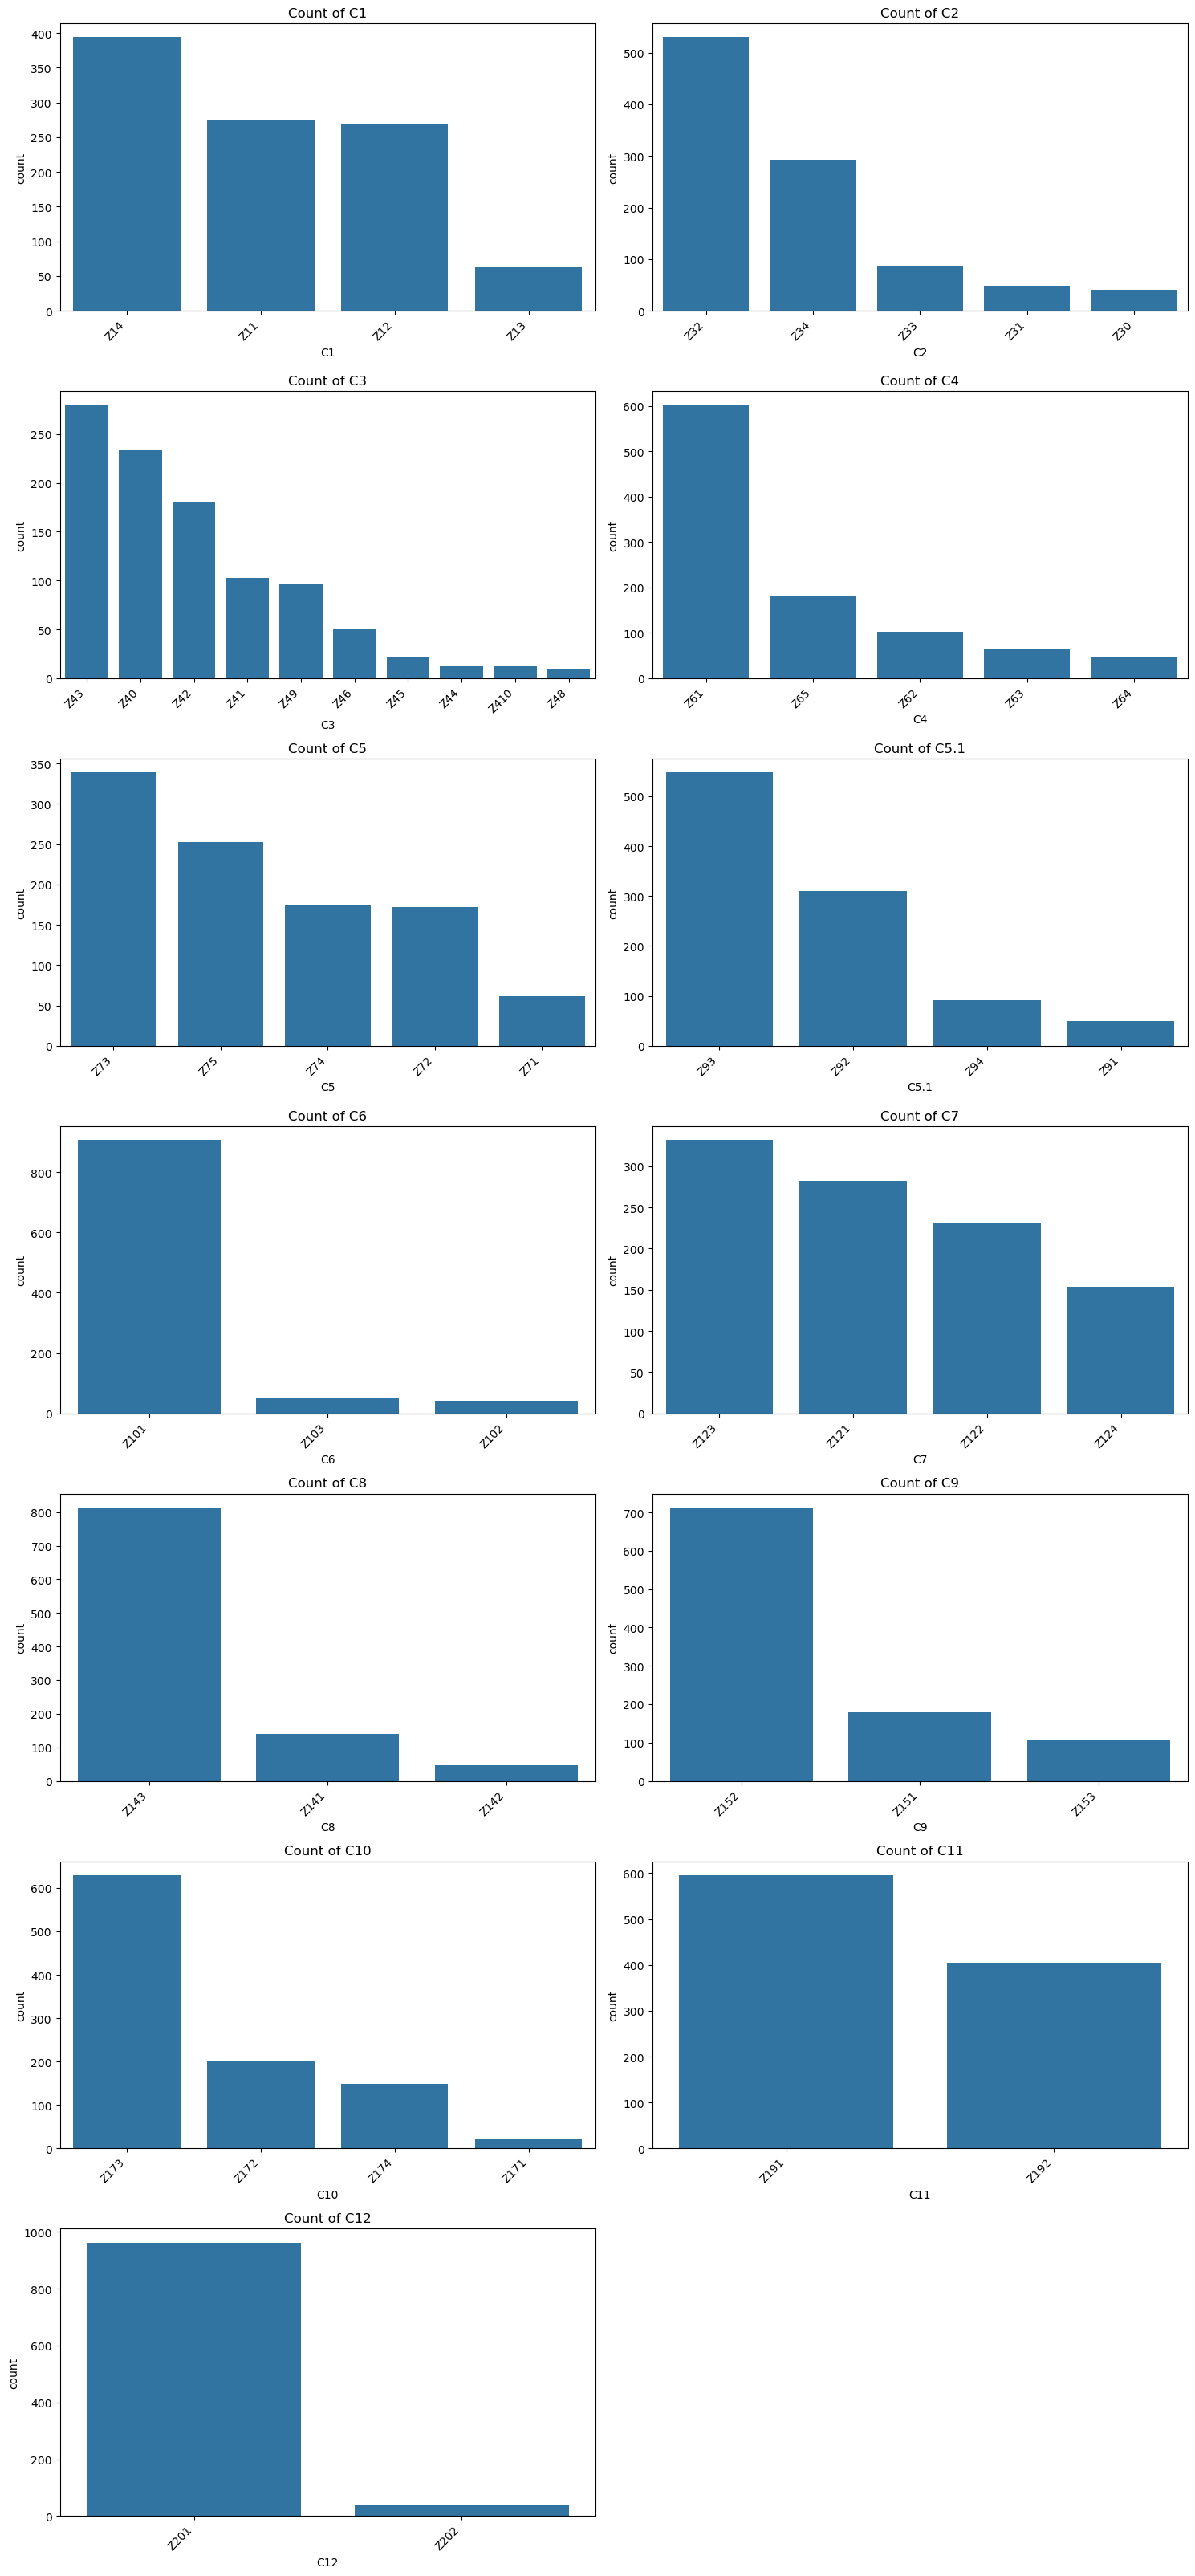

In [47]:
# Check the categorical columns
categorical_cols = data.select_dtypes(include='object').columns

plot_categorical_distribution(data, categorical_cols)

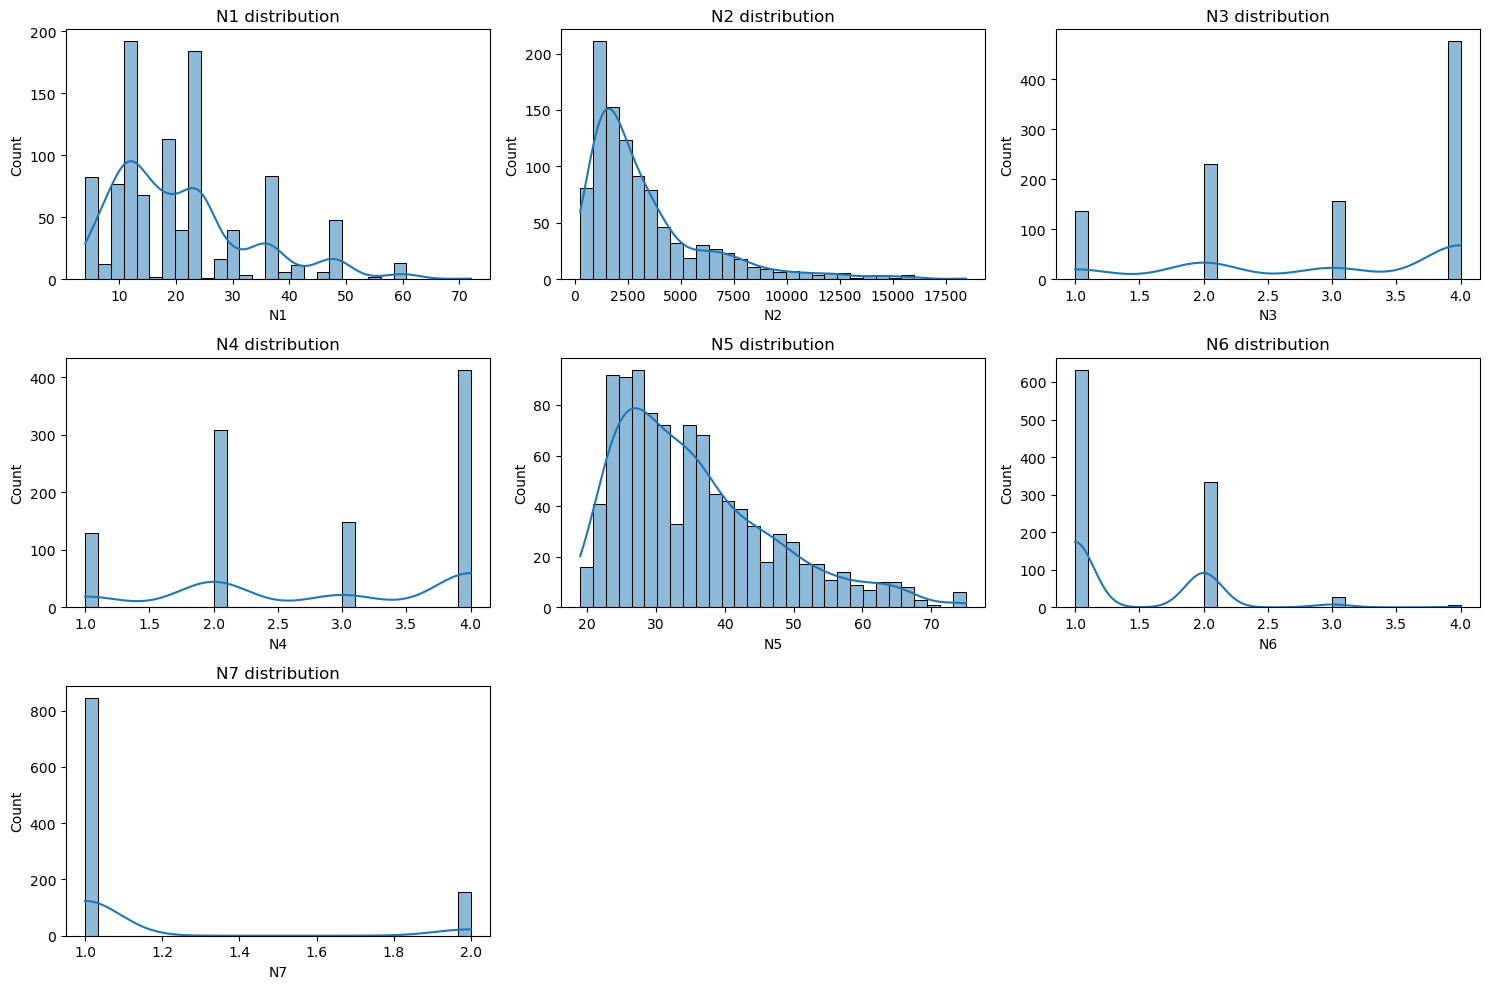

In [25]:
# Check the numerical columns
numerical_cols = data.select_dtypes(include='int64').columns[:-1]  # Exclude LABEL

plot_numerical_distribution(data, numerical_cols)

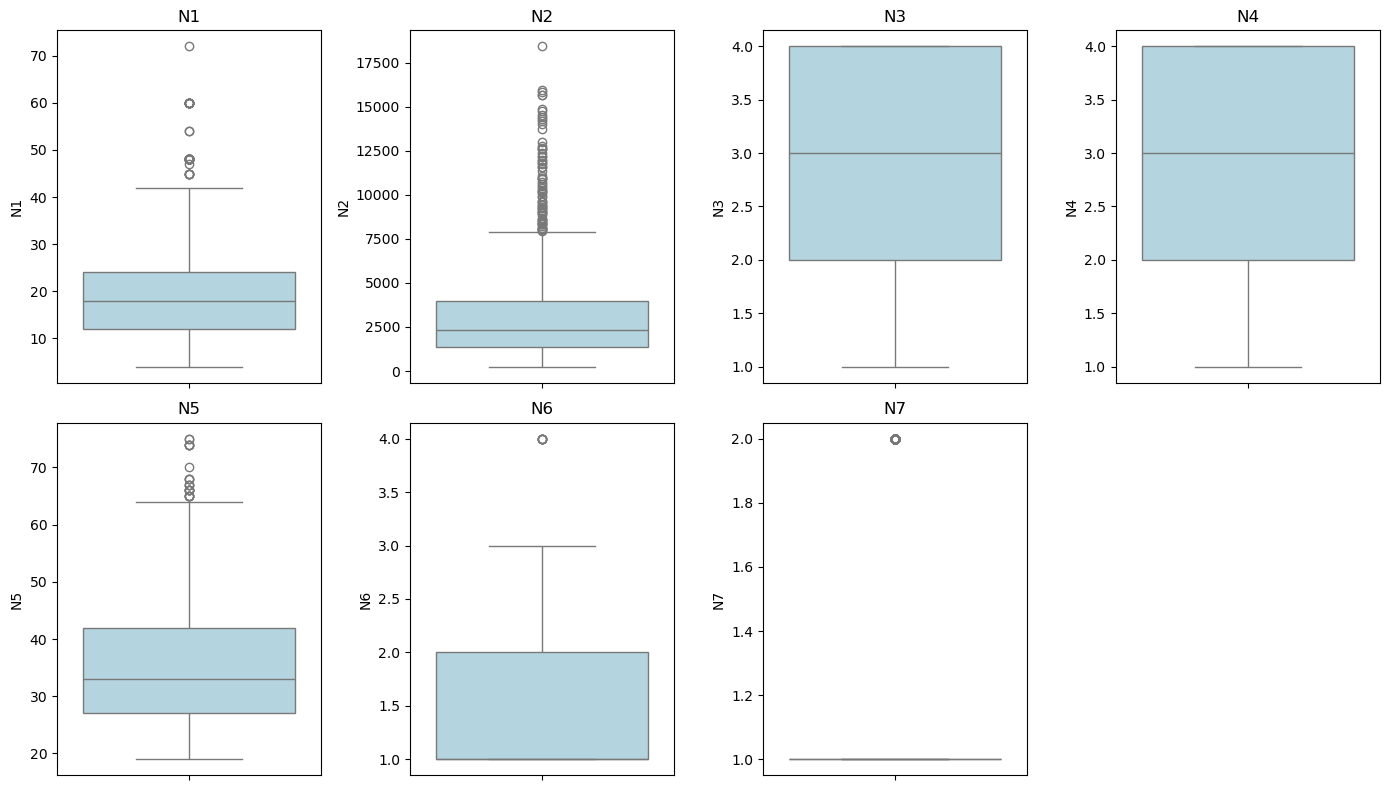

In [55]:
# Check for outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()


Target variable:
LABEL
1    0.7
2    0.3
Name: proportion, dtype: float64


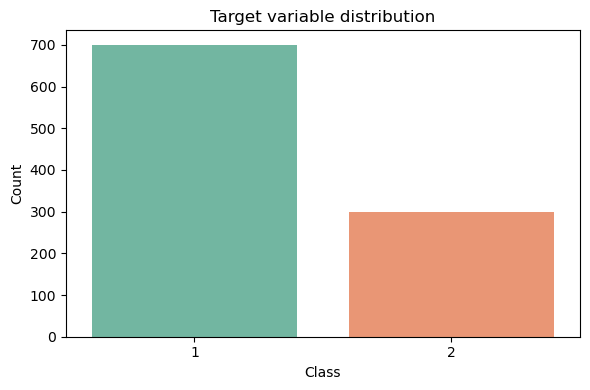

In [37]:
# Check the target variable distribution
print("\nTarget variable:")
print(data.iloc[:, -1].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='LABEL', palette='Set2')
plt.title('Target variable distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

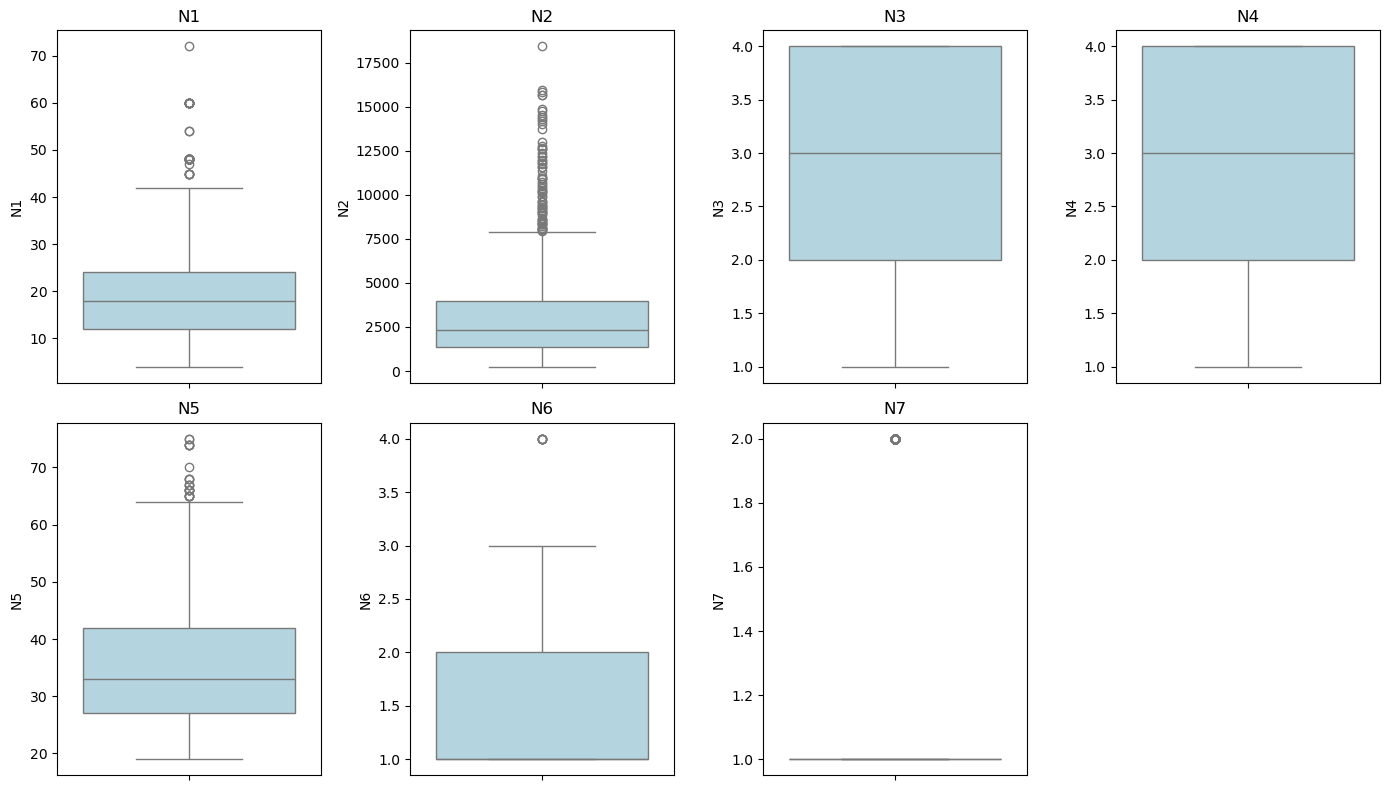

In [43]:
# Estatísticas descritivas das variáveis numéricas
numerical_summary = data[numerical_cols].describe().T

# Distribuições individuais com boxplots para identificar outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()